In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('/content/sample_data/gurgaon_properties_outlier_treated (1).csv')

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000


In [9]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


# built up area

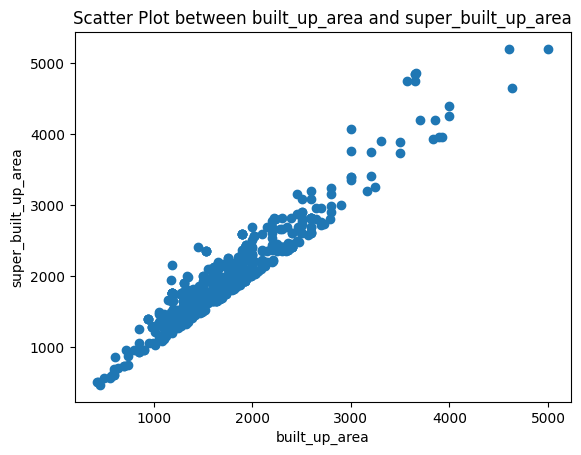

In [10]:
plt.scatter(df['built_up_area'], df['super_built_up_area'])
plt.xlabel('built_up_area')
plt.ylabel('super_built_up_area')
plt.title('Scatter Plot between built_up_area and super_built_up_area')
plt.show()

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

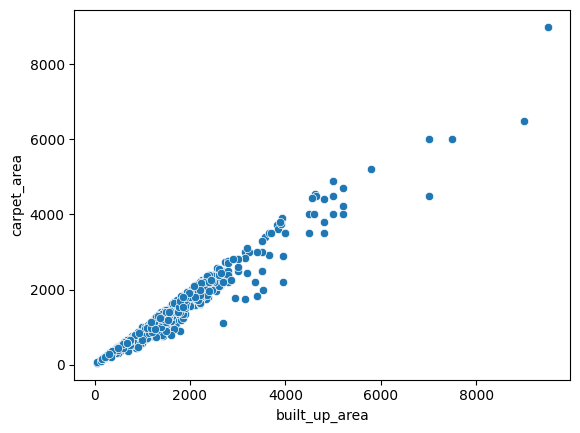

In [11]:
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')

In [16]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

,0
0,False
1,False
2,False
3,False
4,False
...,...
3550,False
3551,False
3552,False
3553,False


In [23]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [27]:
super_to_built_up_ratio = (all_present_df['super_built_up_area'] / all_present_df['built_up_area']).median()

In [28]:
carpet_to_built_up_ratio = (all_present_df['carpet_area'] / all_present_df['built_up_area']).median()

In [29]:
print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.105263157894737
0.9


In [32]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [31]:
sbc_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0,1337.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-West,Relatively New,583.0,NaN,483.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,291.500000
3551,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5.0,5.0,3+,2.0,South-West,Relatively New,NaN,6228.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,160.0,1245.600000
3552,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1.0,1.0,1,5.0,North-East,Moderately Old,735.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,67.0,735.000000
3553,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5.0,6.0,3,3.0,East,Moderately Old,NaN,5490.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,76.0,1098.000000


In [35]:
sbc_df['built_up_area'].fillna(round((sbc_df['super_built_up_area']/1.05 + (sbc_df['carpet_area']/0.9))/2), inplace=True)

<ipython-input-35-5bbb0d848588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round((sbc_df['super_built_up_area']/1.05 + (sbc_df['carpet_area']/0.9))/2), inplace=True)


In [36]:
df.update(sbc_df)

In [37]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [39]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [41]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.05),inplace=True)

<ipython-input-41-c45b68d73bc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.05),inplace=True)


In [42]:
df.update(sb_df)

In [43]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [44]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [45]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-45-4b4741062d49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [46]:
df.update(c_df)

In [47]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


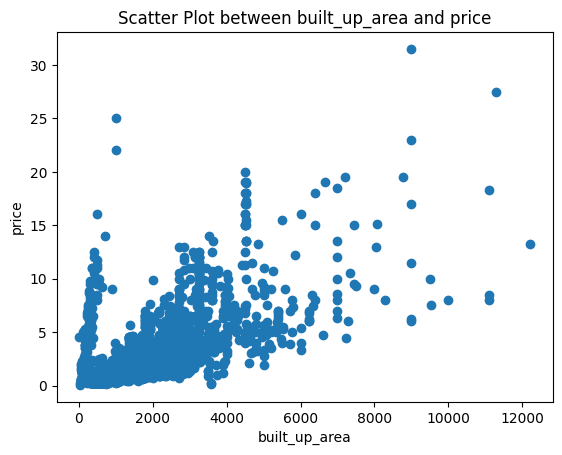

In [49]:
# scatter plot between built_up_area and price
plt.scatter(df['built_up_area'], df['price'])
plt.xlabel('built_up_area')
plt.ylabel('price')
plt.title('Scatter Plot between built_up_area and price')
plt.show()

In [50]:
anaomlt_df = df[(df['built_up_area'] < 2000) & (df['price']>2.5)][['price','area','built_up_area']]

In [51]:
anaomlt_df

,price,area,built_up_area
9,4.50,1350.0,1350.0
35,8.25,2160.0,300.0
41,5.50,1800.0,1800.0
58,5.75,2430.0,260.0
68,7.60,1961.0,1935.0
...,...,...,...
3471,4.25,1620.0,1620.0
3472,9.80,3240.0,300.0
3507,3.90,1174.0,1389.0
3522,3.60,1449.0,1449.0


In [52]:
anaomlt_df['built_up_area'] = anaomlt_df['area']

In [53]:
df.update(anaomlt_df)

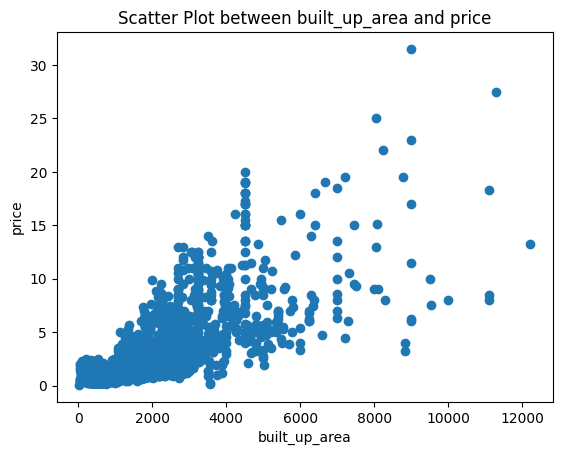

In [54]:
plt.scatter(df['built_up_area'], df['price'])
plt.xlabel('built_up_area')
plt.ylabel('price')
plt.title('Scatter Plot between built_up_area and price')
plt.show()

In [55]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'], inplace=True)

In [56]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,17
facing,1011


## Floor num ##

In [57]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1294,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1452,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1465,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2157,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2271,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,1.0,114.0
2439,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0


In [58]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [59]:
df['floorNum'].fillna(2.0, inplace=True)

In [60]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1011


## facing ##

<Axes: ylabel='count'>

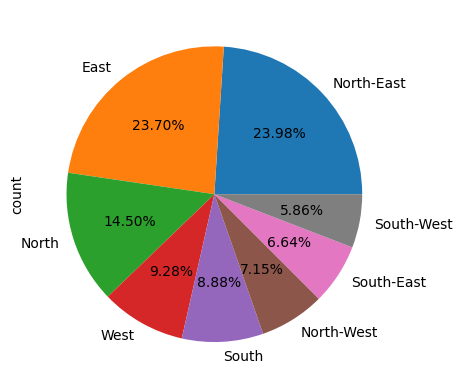

In [61]:
# ditribution of facing
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [62]:
df.drop(columns=['facing'], inplace=True)

In [63]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
167,house,experion windchants,sector 112,7.46,10260.0,4.0,4.0,3+,2.0,Relatively New,6350.0,0.0,1.0,0.0,1.0,0.0,1.0,62.0
308,house,signature global park,sohna road,0.85,7589.0,3.0,2.0,2,1.0,Under Construction,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1688,flat,gls arawali homes,sohna road,0.30,5291.0,2.0,2.0,2,10.0,Relatively New,529.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
1236,flat,tulip violet,sector 69,1.40,8929.0,3.0,3.0,1,12.0,Relatively New,1413.0,0.0,0.0,0.0,1.0,0.0,0.0,174.0
2321,flat,bestech park view ananda,sector 81,1.35,7542.0,3.0,3.0,3+,10.0,Moderately Old,1480.0,0.0,0.0,1.0,0.0,0.0,1.0,72.0


In [64]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2536,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df.drop(index=[2536], inplace=True)

## age possession ##

In [66]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1605
New Property,557
Moderately Old,545
Old Property,293
Undefined,291
Under Construction,263


In [69]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,house,greenopolis,sector 89,0.70,5397.0,2.0,2.0,2,14.0,Undefined,1297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Undefined,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
70,flat,rof aalayas,sector 102,0.45,6000.0,1.0,1.0,2,6.0,Undefined,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Undefined,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,flat,raheja vedaanta,sector 108,0.70,4522.0,2.0,2.0,3,1.0,Undefined,1548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3502,flat,signature global city,sector 37d,1.10,9839.0,2.0,2.0,2,4.0,Undefined,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
3508,house,independent,sector 21,0.45,8411.0,3.0,2.0,1,1.0,Undefined,594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3520,flat,sidhartha ncr one,sector 95,0.57,4179.0,2.0,2.0,2,10.0,Undefined,1364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
def mode_based_imputation(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation, axis=1)

In [72]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1715
New Property,598
Moderately Old,585
Old Property,324
Under Construction,277
Undefined,55


In [73]:
def mode_based_imputation2(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector']==row['sector'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation2, axis=1)

In [75]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1730
New Property,599
Moderately Old,592
Old Property,327
Under Construction,277
Undefined,29


In [77]:
def mode_based_imputation3(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['property_type']==row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [79]:
df['agePossession'] = df.apply(mode_based_imputation3, axis=1)

In [80]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1732
Moderately Old,619
New Property,599
Old Property,327
Under Construction,277


In [81]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [82]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv', index=False)